<a href="https://colab.research.google.com/github/harishmuh/R_tutorial/blob/main/Data_Transformation_in_R_tutorial_from_Coursera_Project_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data transformation in R tutorial from Coursera Project Network**
---

Notes:
- The tutorial was conducted using Rstudio cloud or posit.cloud. However, I was using notebook from google colab
- To change the Python notebook into R notebook simply change the runtime type from Python3 into R.

**Initial setup**

In [6]:
# Installing tidyverse packages
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
# Attaching tidyverse packages
library(tidyverse)


In [8]:
# Reading excel file from github
library(readxl)
library(httr)

# Correct raw url (binary files must use /raw/ not /blob/ or /refs/heads/)
url_xlsx <- "https://github.com/harishmuh/R_tutorial/raw/main/datasets/injuries.xlsx"

# Download the file temporarily using httr::GET to ensure proper handling of binary files
temp_file <- tempfile(fileext = ".xlsx")
GET(url_xlsx, write_disk(temp_file, overwrite = TRUE))

# Read Excel
injuries <- read_excel(temp_file)

# Check first rows
head(injuries)

Response [https://raw.githubusercontent.com/harishmuh/R_tutorial/main/datasets/injuries.xlsx]
  Date: 2025-09-16 02:47
  Status: 200
  Content-Type: application/octet-stream
  Size: 14.3 kB
<ON DISK>  /tmp/RtmpGUMlT6/filefad2afd21.xlsxNULL

age,type,injury,estimate
<chr>,<chr>,<chr>,<chr>
0-17,Emergency Department Visit,Motor Vehicle Crashes,47138
0-17,Emergency Department Visit,Unintentional Falls,397190
0-17,Emergency Department Visit,Unintentionally struck by or against an object,229236
0-17,Emergency Department Visit,"Other unintentional injury, mechanism unspecified",55785
0-17,Emergency Department Visit,Intentional self-harm,NA
0-17,Emergency Department Visit,Assault,24360


In [9]:
# Converting the incorrect data type
# Convert estimate column to numeric, handling missing value 'NA' properly
injuries$estimate <- as.numeric(injuries$estimate)

# Check structure
str(injuries)

# Preview first rows
head(injuries)


Warning message:
“NAs introduced by coercion”


tibble [231 × 4] (S3: tbl_df/tbl/data.frame)
 $ age     : chr [1:231] "0-17" "0-17" "0-17" "0-17" ...
 $ type    : chr [1:231] "Emergency Department Visit" "Emergency Department Visit" "Emergency Department Visit" "Emergency Department Visit" ...
 $ injury  : chr [1:231] "Motor Vehicle Crashes" "Unintentional Falls" "Unintentionally struck by or against an object" "Other unintentional injury, mechanism unspecified" ...
 $ estimate: num [1:231] 47138 397190 229236 55785 NA ...


age,type,injury,estimate
<chr>,<chr>,<chr>,<dbl>
0-17,Emergency Department Visit,Motor Vehicle Crashes,47138
0-17,Emergency Department Visit,Unintentional Falls,397190
0-17,Emergency Department Visit,Unintentionally struck by or against an object,229236
0-17,Emergency Department Visit,"Other unintentional injury, mechanism unspecified",55785
0-17,Emergency Department Visit,Intentional self-harm,NA
0-17,Emergency Department Visit,Assault,24360


## **Select group of observatios and create new calculated fields**

In [10]:
# Use Select function
# Selecting column # Method 1
select(injuries, age) # table, column

age
<chr>
0-17
0-17
0-17
0-17
0-17
0-17
0-17
0-4
0-4


In [11]:
# Select using pipe operators
injuries %>% select(age)

age
<chr>
0-17
0-17
0-17
0-17
0-17
0-17
0-17
0-4
0-4


In [12]:
 # # Select using pipe operators # Using index
injuries %>% select(1)

age
<chr>
0-17
0-17
0-17
0-17
0-17
0-17
0-17
0-4
0-4


In [13]:
# Selecting 2 columns
injuries %>% select(c(age,type))

age,type
<chr>,<chr>
0-17,Emergency Department Visit
0-17,Emergency Department Visit
0-17,Emergency Department Visit
0-17,Emergency Department Visit
0-17,Emergency Department Visit
0-17,Emergency Department Visit
0-17,Emergency Department Visit
0-4,Emergency Department Visit
0-4,Emergency Department Visit


In [14]:
# Use Filter
injuries %>% filter(age=="0-17")

age,type,injury,estimate
<chr>,<chr>,<chr>,<dbl>
0-17,Emergency Department Visit,Motor Vehicle Crashes,47138
0-17,Emergency Department Visit,Unintentional Falls,397190
0-17,Emergency Department Visit,Unintentionally struck by or against an object,229236
0-17,Emergency Department Visit,"Other unintentional injury, mechanism unspecified",55785
0-17,Emergency Department Visit,Intentional self-harm,NA
0-17,Emergency Department Visit,Assault,24360
0-17,Emergency Department Visit,Other or no mechanism specified,57983
0-17,Hospitalizations,Motor Vehicle Crashes,5830
0-17,Hospitalizations,Unintentional Falls,7935


In [15]:
# aggregation # Group by
injuries %>% group_by(type)

age,type,injury,estimate
<chr>,<chr>,<chr>,<dbl>
0-17,Emergency Department Visit,Motor Vehicle Crashes,47138
0-17,Emergency Department Visit,Unintentional Falls,397190
0-17,Emergency Department Visit,Unintentionally struck by or against an object,229236
0-17,Emergency Department Visit,"Other unintentional injury, mechanism unspecified",55785
0-17,Emergency Department Visit,Intentional self-harm,NA
0-17,Emergency Department Visit,Assault,24360
0-17,Emergency Department Visit,Other or no mechanism specified,57983
0-4,Emergency Department Visit,Motor Vehicle Crashes,5464
0-4,Emergency Department Visit,Unintentional Falls,230776


In [16]:
injuries %>% group_by(type) %>% summarize(total=sum(estimate, na.rm=TRUE)) # missing values also has been handled

type,total
<chr>,<dbl>
Deaths,115442
Emergency Department Visit,5876203
Hospitalizations,599685


## **Pivot data in R, into wide and long format**

* We need to pivot data to get data in different format.

* We will need to make the data into tidy data format.

* Tidy data is a way of organizing datasets so they are easier to work with in R (especially with the tidyverse).



### **3 principles of tidy data**

* Each variable forms a column

  * Example: age, type, injury, estimate should each be their own columns.

* Each observation forms a row

  * Example: One row represents one unique case, like 0-17 | Emergency Department Visit | Motor Vehicle Crashes | 47138.

* Each value forms a single cell

  * Each cell contains just one value, not multiple values combined.

### Example of Tidy vs Messy Data

**Messy data (wide format):**

| age  | Motor Vehicle Crashes | Unintentional Falls | Assault |
|------|------------------------|---------------------|---------|
| 0-17 | 47138                  | 397190              | 24360   |

---

**Tidy data (long format):**

| age  | injury                  | estimate |
|------|-------------------------|----------|
| 0-17 | Motor Vehicle Crashes   | 47138    |
| 0-17 | Unintentional Falls     | 397190   |
| 0-17 | Assault                 | 24360    |

In [17]:
# We are using dataset from tidyverse
head(relig_income) # This is not tidy data

religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Agnostic,27,34,60,81,76,137,122,109,84,96
Atheist,12,27,37,52,35,70,73,59,74,76
Buddhist,27,21,30,34,33,58,62,39,53,54
Catholic,418,617,732,670,638,1116,949,792,633,1489
Don’t know/refused,15,14,15,11,10,35,21,17,18,116
Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529


In [18]:
# Convert wide format into long format
relig_income %>% pivot_longer(!religion) # Pivot all but not religion

religion,name,value
<chr>,<chr>,<dbl>
Agnostic,<$10k,27
Agnostic,$10-20k,34
Agnostic,$20-30k,60
Agnostic,$30-40k,81
Agnostic,$40-50k,76
Agnostic,$50-75k,137
Agnostic,$75-100k,122
Agnostic,$100-150k,109
Agnostic,>150k,84


In [19]:
# Pivot into wider format
relig_income %>% pivot_longer(!religion) %>% pivot_wider(names_from = name, values_from = value)

religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Agnostic,27,34,60,81,76,137,122,109,84,96
Atheist,12,27,37,52,35,70,73,59,74,76
Buddhist,27,21,30,34,33,58,62,39,53,54
Catholic,418,617,732,670,638,1116,949,792,633,1489
Don’t know/refused,15,14,15,11,10,35,21,17,18,116
Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
Hindu,1,9,7,9,11,34,47,48,54,37
Historically Black Prot,228,244,236,238,197,223,131,81,78,339
Jehovah's Witness,20,27,24,24,21,30,15,11,6,37


In [20]:
injuries %>% pivot_wider(names_from = "injury", values_from="estimate")

age,type,Motor Vehicle Crashes,Unintentional Falls,Unintentionally struck by or against an object,"Other unintentional injury, mechanism unspecified",Intentional self-harm,Assault,Other or no mechanism specified
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-17,Emergency Department Visit,47138,397190,229236,55785,NA,24360,57983
0-4,Emergency Department Visit,5464,230776,53436,12007,NA,674,19360
5-14,Emergency Department Visit,19785,133084,120839,30656,NA,9690,26022
15-24,Emergency Department Visit,103892,96568,106679,37118,870,65399,33395
25-34,Emergency Department Visit,71641,70210,44404,22360,650,57213,20974
35-44,Emergency Department Visit,44108,68830,32479,17541,421,34100,16503
45-54,Emergency Department Visit,40020,95127,30495,17808,247,27682,15962
55-64,Emergency Department Visit,27193,112460,20408,12928,105,11538,13387
65-74,Emergency Department Visit,13829,120327,11937,7077,NA,2893,10051


In [21]:
injuries %>% pivot_wider(names_from = "injury", values_from="estimate")

age,type,Motor Vehicle Crashes,Unintentional Falls,Unintentionally struck by or against an object,"Other unintentional injury, mechanism unspecified",Intentional self-harm,Assault,Other or no mechanism specified
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-17,Emergency Department Visit,47138,397190,229236,55785,NA,24360,57983
0-4,Emergency Department Visit,5464,230776,53436,12007,NA,674,19360
5-14,Emergency Department Visit,19785,133084,120839,30656,NA,9690,26022
15-24,Emergency Department Visit,103892,96568,106679,37118,870,65399,33395
25-34,Emergency Department Visit,71641,70210,44404,22360,650,57213,20974
35-44,Emergency Department Visit,44108,68830,32479,17541,421,34100,16503
45-54,Emergency Department Visit,40020,95127,30495,17808,247,27682,15962
55-64,Emergency Department Visit,27193,112460,20408,12928,105,11538,13387
65-74,Emergency Department Visit,13829,120327,11937,7077,NA,2893,10051


### **Quiz**

Case:
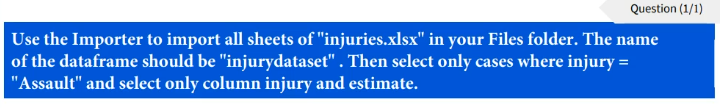

In [24]:
# Reading excel file from github
library(readxl)
library(httr)

# Correct raw url (binary files must use /raw/ not /blob/ or /refs/heads/)
url_xlsx <- "https://github.com/harishmuh/R_tutorial/raw/main/datasets/injuries.xlsx"

# Download the file temporarily using httr::GET to ensure proper handling of binary files
temp_file <- tempfile(fileext = ".xlsx")
GET(url_xlsx, write_disk(temp_file, overwrite = TRUE))

# Read Excel
injurydataset <- read_excel(temp_file)

# Check first rows
head(injurydataset)

Response [https://raw.githubusercontent.com/harishmuh/R_tutorial/main/datasets/injuries.xlsx]
  Date: 2025-09-16 02:59
  Status: 200
  Content-Type: application/octet-stream
  Size: 14.3 kB
<ON DISK>  /tmp/RtmpGUMlT6/filefa1c9908b5.xlsxNULL

age,type,injury,estimate
<chr>,<chr>,<chr>,<chr>
0-17,Emergency Department Visit,Motor Vehicle Crashes,47138
0-17,Emergency Department Visit,Unintentional Falls,397190
0-17,Emergency Department Visit,Unintentionally struck by or against an object,229236
0-17,Emergency Department Visit,"Other unintentional injury, mechanism unspecified",55785
0-17,Emergency Department Visit,Intentional self-harm,NA
0-17,Emergency Department Visit,Assault,24360


In [26]:
injurydataset %>% filter(injury == 'Assault') %>% select(injury,estimate)

injury,estimate
<chr>,<chr>
Assault,24360
Assault,674
Assault,9690
Assault,65399
Assault,57213
Assault,34100
Assault,27682
Assault,11538
Assault,2893


## **Handling missing values**

**Data observation**

In [27]:
head(injuries)

age,type,injury,estimate
<chr>,<chr>,<chr>,<dbl>
0-17,Emergency Department Visit,Motor Vehicle Crashes,47138
0-17,Emergency Department Visit,Unintentional Falls,397190
0-17,Emergency Department Visit,Unintentionally struck by or against an object,229236
0-17,Emergency Department Visit,"Other unintentional injury, mechanism unspecified",55785
0-17,Emergency Department Visit,Intentional self-harm,NA
0-17,Emergency Department Visit,Assault,24360


In [28]:
# To get value in the vector estimate
injuries$estimate

[1]   47138  397190  229236   55785      NA   24360   57983    5464  230776
 [10]   53436   12007      NA     674   19360   19785  133084  120839   30656
 [19]      NA    9690   26022  103892   96568  106679   37118     870   65399
 [28]   33395   71641   70210   44404   22360     650   57213   20974   44108
 [37]   68830   32479   17541     421   34100   16503   40020   95127   30495
 [46]   17808     247   27682   15962   27193  112460   20408   12928     105
 [55]   11538   13387   13829  120327   11937    7077      NA    2893   10051
 [64]    8176  286031   13270    7440      NA    1260   17318  334109 1213412
 [73]  433947  164935    2567  210450  172974    5830    7935    1985    3135
 [82]      NA    1535    2595     870    4700     510     785      NA     960
 [91]    1140    2395    2270     980    1435      NA     195     955   12925
[100]    3910    1070    3060     280    3125    2050   11050    4470     635
[109]    2600     440    4320    1965    7305    5640     610    2255     340
[118]    2865    1920    8490   12010     685    3140     350    3290    2775
[127]    7280   18490     765    3165     145    1780    4215    4485   25235
[136]     790    2180      85     535    5085    3965   74005    1045    2550
[145]      70     325   11360   58765  150730    7090   21170    1730   17395
[154]   31465     931      48      52     308      NA     611      61     187
[163]      19      27     136      NA     322      30     326      16      19
[172]     110      NA     117      19    2419      95      21     344    2171
[181]    1165      96    1960     175      34     345    2622    1110     125
[190]    1402     328      41     388    2502     732     152    1484     908
[199]      62     618    3334     633     297    1287    1674      70     585
[208]    3233     410     393     797    2324      60     504    2244     241
[217]     356     794   10400      44     859    2212     174    1079   10656
[226]   15939     378    3889   18485    4906    2547

In [30]:
# Is there any NA in the vector estimate
any(is.na(injuries$estimate))

[1] TRUE

In [31]:
# How many NA the estimate vector
sum(is.na(injuries$estimate))

[1] 11

**Data dimension**

In [32]:
# data dimension # rows and columns
# Number of rows
nrow(injuries)

# Number of columns
ncol(injuries)

# Both at once
dim(injuries)


[1] 231

[1] 4

[1] 231   4

In [34]:
# Before missing values handling
# Shows rows, columns, and data types
glimpse(injuries)

Rows: 231
Columns: 4
$ age      <chr> "0-17", "0-17", "0-17", "0-17", "0-17", "0-17", "0-17", "0-4"…
$ type     <chr> "Emergency Department Visit", "Emergency Department Visit", "…
$ injury   <chr> "Motor Vehicle Crashes", "Unintentional Falls", "Unintentiona…
$ estimate <dbl> 47138, 397190, 229236, 55785, NA, 24360, 57983, 5464, 230776,…


### **Handling missing values - Dropping**

In [38]:
# Removing missing values
# Drop rows with any NA values
injuries <- injuries %>% drop_na()

In [39]:
# After missing values handling
# Shows rows, columns, and data types
glimpse(injuries)

Rows: 220
Columns: 4
$ age      <chr> "0-17", "0-17", "0-17", "0-17", "0-17", "0-17", "0-4", "0-4",…
$ type     <chr> "Emergency Department Visit", "Emergency Department Visit", "…
$ injury   <chr> "Motor Vehicle Crashes", "Unintentional Falls", "Unintentiona…
$ estimate <dbl> 47138, 397190, 229236, 55785, 24360, 57983, 5464, 230776, 534…


### **Handling missing values - Replace with mean**

Beside dropping, we can also handle missing values by replacing them with mean values.

In [40]:
injuries$estimate[is.na(injuries$estimate)] <-
  mean(injuries$estimate, na.rm = TRUE)


In [42]:
# After missing values handling
# Shows rows, columns, and data types
glimpse(injuries$estimate)

 num [1:220] 47138 397190 229236 55785 24360 ...


## **Split and combine cells and columns in R**

We will use a new dataset of "student grade.xlsx"

In [44]:
# Reading excel file from github
library(readxl)
library(httr)

# Correct raw url (binary files must use /raw/ not /blob/ or /refs/heads/)
url_xlsx <- "https://github.com/harishmuh/R_tutorial/raw/main/datasets/student%20grades.xlsx"

# Download the file temporarily using httr::GET to ensure proper handling of binary files
temp_file <- tempfile(fileext = ".xlsx")
GET(url_xlsx, write_disk(temp_file, overwrite = TRUE))

# Read Excel
grades <- read_excel(temp_file)

# Check first rows
head(grades)

Response [https://raw.githubusercontent.com/harishmuh/R_tutorial/main/datasets/student%20grades.xlsx]
  Date: 2025-09-16 03:40
  Status: 200
  Content-Type: application/octet-stream
  Size: 21 kB
<ON DISK>  /tmp/RtmpGUMlT6/filefa4fc0cfc0.xlsxNULL

student_id,last_name,first_name
<dbl>,<chr>,<chr>
27,Marian,Ryan
28,Sandra,Moss
33,Rodney,Howell
34,Sheldon,Black
40,Amos,Clarke
46,Daisy,Osborne


### **Combine cells**

In [45]:
# We will combine both first_name and last_name
unite(grades, c(first_name, last_name), col=full_name)

student_id,full_name
<dbl>,<chr>
27,Ryan_Marian
28,Moss_Sandra
33,Howell_Rodney
34,Black_Sheldon
40,Clarke_Amos
46,Osborne_Daisy
61,Woods_Jaime
64,Wise_Sonja
67,Hernandez_Brandi


In [46]:
grades %>% mutate(full_name=paste(first_name, last_name))

student_id,last_name,first_name,full_name
<dbl>,<chr>,<chr>,<chr>
27,Marian,Ryan,Ryan Marian
28,Sandra,Moss,Moss Sandra
33,Rodney,Howell,Howell Rodney
34,Sheldon,Black,Black Sheldon
40,Amos,Clarke,Clarke Amos
46,Daisy,Osborne,Osborne Daisy
61,Jaime,Woods,Woods Jaime
64,Sonja,Wise,Wise Sonja
67,Brandi,Hernandez,Hernandez Brandi


### **Split cells**

In [47]:
# Creating grades2
grades2 <- grades %>% unite(c(first_name, last_name), col=full_name, sep=" ")

In [48]:
head(grades2)

student_id,full_name
<dbl>,<chr>
27,Ryan Marian
28,Moss Sandra
33,Howell Rodney
34,Black Sheldon
40,Clarke Amos
46,Osborne Daisy


In [49]:
# Splitting
grades2 %>% separate(full_name, into=c("first_name", "last_name"), sep=" ")

student_id,first_name,last_name
<dbl>,<chr>,<chr>
27,Ryan,Marian
28,Moss,Sandra
33,Howell,Rodney
34,Black,Sheldon
40,Clarke,Amos
46,Osborne,Daisy
61,Woods,Jaime
64,Wise,Sonja
67,Hernandez,Brandi


## **Join data from different tables**

**Reading file from specific sheet name**

In [52]:
# Reading the first table
# Reading excel file from github
library(readxl)
library(httr)

# Correct raw url (binary files must use /raw/ not /blob/ or /refs/heads/)
url_xlsx <- "https://github.com/harishmuh/R_tutorial/raw/main/datasets/student%20grades.xlsx"

# Download the file temporarily using httr::GET to ensure proper handling of binary files
temp_file <- tempfile(fileext = ".xlsx")
GET(url_xlsx, write_disk(temp_file, overwrite = TRUE))

# Read Excel - first table "student" sheet
ids <- read_excel(temp_file, sheet = "students")

# Check first rows
head(ids)

Response [https://raw.githubusercontent.com/harishmuh/R_tutorial/main/datasets/student%20grades.xlsx]
  Date: 2025-09-16 04:25
  Status: 200
  Content-Type: application/octet-stream
  Size: 21 kB
<ON DISK>  /tmp/RtmpGUMlT6/filefa7c5d8fd7.xlsxNULL

student_id,last_name,first_name
<dbl>,<chr>,<chr>
27,Marian,Ryan
28,Sandra,Moss
33,Rodney,Howell
34,Sheldon,Black
40,Amos,Clarke
46,Daisy,Osborne


In [53]:
# Reading the second table
# Read Excel - second table: "grades" sheet
grades <- read_excel(temp_file, sheet = "grades")

# Check first rows
head(grades)

student_id,course_id,course_name,grade
<dbl>,<chr>,<chr>,<dbl>
27,MATH 302,Mathematics,74
27,PHY 311,Physics,75
28,MATH 302,Mathematics,77
28,PHY 311,Physics,81
33,MATH 302,Mathematics,99
33,PHY 311,Physics,99


We can see there is the 'student_id' column in both of tables.

we can combine it.

In [54]:
# Join two different tables
ids %>% inner_join(grades, by = "student_id")

student_id,last_name,first_name,course_id,course_name,grade
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
27,Marian,Ryan,MATH 302,Mathematics,74
27,Marian,Ryan,PHY 311,Physics,75
28,Sandra,Moss,MATH 302,Mathematics,77
28,Sandra,Moss,PHY 311,Physics,81
33,Rodney,Howell,MATH 302,Mathematics,99
33,Rodney,Howell,PHY 311,Physics,99
34,Sheldon,Black,PHY 311,Physics,70
34,Sheldon,Black,MATH 302,Mathematics,77
40,Amos,Clarke,MATH 302,Mathematics,66


**We have learnt several functions**

* select() filter() group_by() summarize() mutate() inner_join()

* unite() separate() pivot_longer() pivot_wider()

### **Quiz**

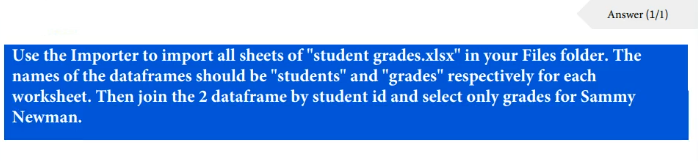

In [55]:
# Reading the first table
# Reading excel file from github
library(readxl)
library(httr)

# Correct raw url (binary files must use /raw/ not /blob/ or /refs/heads/)
url_xlsx <- "https://github.com/harishmuh/R_tutorial/raw/main/datasets/student%20grades.xlsx"

# Download the file temporarily using httr::GET to ensure proper handling of binary files
temp_file <- tempfile(fileext = ".xlsx")
GET(url_xlsx, write_disk(temp_file, overwrite = TRUE))

# Read Excel - first table "student" sheet
students <- read_excel(temp_file, sheet = "students")

# Check first rows
head(students)

Response [https://raw.githubusercontent.com/harishmuh/R_tutorial/main/datasets/student%20grades.xlsx]
  Date: 2025-09-16 04:37
  Status: 200
  Content-Type: application/octet-stream
  Size: 21 kB
<ON DISK>  /tmp/RtmpGUMlT6/filefa6e3eb83d.xlsxNULL

student_id,last_name,first_name
<dbl>,<chr>,<chr>
27,Marian,Ryan
28,Sandra,Moss
33,Rodney,Howell
34,Sheldon,Black
40,Amos,Clarke
46,Daisy,Osborne


In [56]:
# Reading the second table
# Read Excel - second table: "grades" sheet
grades <- read_excel(temp_file, sheet = "grades")

# Check first rows
head(grades)

student_id,course_id,course_name,grade
<dbl>,<chr>,<chr>,<dbl>
27,MATH 302,Mathematics,74
27,PHY 311,Physics,75
28,MATH 302,Mathematics,77
28,PHY 311,Physics,81
33,MATH 302,Mathematics,99
33,PHY 311,Physics,99


In [57]:
# Join 2 dataframe by student id
students %>% inner_join(grades, by = "student_id")

student_id,last_name,first_name,course_id,course_name,grade
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
27,Marian,Ryan,MATH 302,Mathematics,74
27,Marian,Ryan,PHY 311,Physics,75
28,Sandra,Moss,MATH 302,Mathematics,77
28,Sandra,Moss,PHY 311,Physics,81
33,Rodney,Howell,MATH 302,Mathematics,99
33,Rodney,Howell,PHY 311,Physics,99
34,Sheldon,Black,PHY 311,Physics,70
34,Sheldon,Black,MATH 302,Mathematics,77
40,Amos,Clarke,MATH 302,Mathematics,66


In [58]:
# Join by student_id
data_joined <- students %>%
  inner_join(grades, by = "student_id")

In [60]:
head(data_joined)

student_id,last_name,first_name,course_id,course_name,grade
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
27,Marian,Ryan,MATH 302,Mathematics,74
27,Marian,Ryan,PHY 311,Physics,75
28,Sandra,Moss,MATH 302,Mathematics,77
28,Sandra,Moss,PHY 311,Physics,81
33,Rodney,Howell,MATH 302,Mathematics,99
33,Rodney,Howell,PHY 311,Physics,99


In [69]:
# Method 1: finding "Sammy Newman" in the joined table
library(dplyr)
library(stringr)

sammy_grades <- data_joined %>%
  mutate(
    first_name = str_squish(first_name),
    last_name  = str_squish(last_name)
  ) %>%
  filter(
    (str_to_lower(first_name) == "sammy" & str_to_lower(last_name) == "newman") |
    (str_to_lower(first_name) == "newman" & str_to_lower(last_name) == "sammy")
  ) %>%
  select(student_id, first_name, last_name, course_name, grade)

sammy_grades


student_id,first_name,last_name,course_name,grade
<dbl>,<chr>,<chr>,<chr>,<dbl>
75,Newman,Sammy,Physics,81
75,Newman,Sammy,Mathematics,84


In [70]:
# Method 2: finding "Sammy Newman" in the joined table
sammy_grades <- data_joined %>%
  filter(
    if_any(everything(), ~ str_detect(.x, regex("sammy", ignore_case = TRUE))) &
    if_any(everything(), ~ str_detect(.x, regex("newman", ignore_case = TRUE)))
  )

sammy_grades


student_id,last_name,first_name,course_id,course_name,grade
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
75,Sammy,Newman,PHY 311,Physics,81
75,Sammy,Newman,MATH 302,Mathematics,84


In [71]:
# Method 3: finding "Sammy Newman" in the joined table
data_joined %>%
  filter(
    if_any(everything(), ~ str_detect(.x, "Sammy")) |
    if_any(everything(), ~ str_detect(.x, "Newman"))
  )

student_id,last_name,first_name,course_id,course_name,grade
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
75,Sammy,Newman,PHY 311,Physics,81
75,Sammy,Newman,MATH 302,Mathematics,84


## **Capstone project**

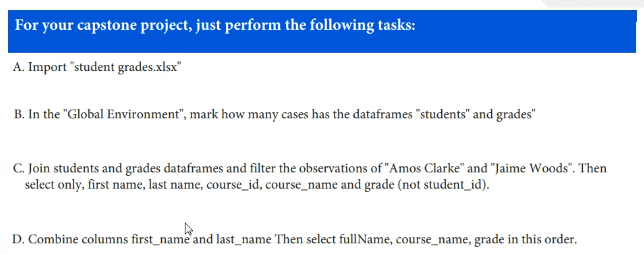

 **A. Importing "Student grades"**

In [72]:
# Importing the first table: "students"
# Reading excel file from github
library(readxl)
library(httr)

# Correct raw url (binary files must use /raw/ not /blob/ or /refs/heads/)
url_xlsx <- "https://github.com/harishmuh/R_tutorial/raw/main/datasets/student%20grades.xlsx"

# Download the file temporarily using httr::GET to ensure proper handling of binary files
temp_file <- tempfile(fileext = ".xlsx")
GET(url_xlsx, write_disk(temp_file, overwrite = TRUE))

# Read Excel - first table "student" sheet
students <- read_excel(temp_file, sheet = "students")

# Check first rows
head(students)

Response [https://raw.githubusercontent.com/harishmuh/R_tutorial/main/datasets/student%20grades.xlsx]
  Date: 2025-09-16 06:06
  Status: 200
  Content-Type: application/octet-stream
  Size: 21 kB
<ON DISK>  /tmp/RtmpGUMlT6/filefaddba65a.xlsxNULL

student_id,last_name,first_name
<dbl>,<chr>,<chr>
27,Marian,Ryan
28,Sandra,Moss
33,Rodney,Howell
34,Sheldon,Black
40,Amos,Clarke
46,Daisy,Osborne


In [73]:
# Importing the second table : "grades"
# Read Excel - second table: "grades" sheet
grades <- read_excel(temp_file, sheet = "grades")

# Check first rows
head(grades)

student_id,course_id,course_name,grade
<dbl>,<chr>,<chr>,<dbl>
27,MATH 302,Mathematics,74
27,PHY 311,Physics,75
28,MATH 302,Mathematics,77
28,PHY 311,Physics,81
33,MATH 302,Mathematics,99
33,PHY 311,Physics,99


**2. Number of grades and students observation**

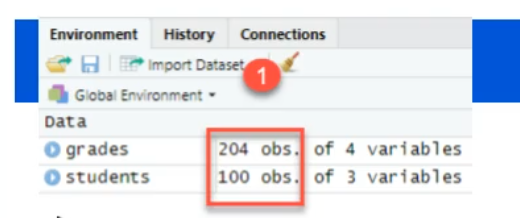

**C. Join the dataframes (students and grade) and filter the names ("Amos Clarke" and "Jaime Wood")**

In [74]:
library(dplyr)

# Joining 2 dataframes - joined by `student_id`
data_joined <- students %>%
  inner_join(grades, by = "student_id")

# Filter the names: Amos Clarke and Jaime Woods
filtered_data <- data_joined %>%
  filter(
    (first_name == "Amos" & last_name == "Clarke") |
    (first_name == "Jaime" & last_name == "Woods")
  ) %>%
  select(first_name, last_name, course_id, course_name, grade)

filtered_data


first_name,last_name,course_id,course_name,grade
<chr>,<chr>,<chr>,<chr>,<dbl>


In [75]:
# Joining 2 dataframes - joined by `student_id`
data_joined <- students %>%
  inner_join(grades, by = "student_id")

head(data_joined)

student_id,last_name,first_name,course_id,course_name,grade
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
27,Marian,Ryan,MATH 302,Mathematics,74
27,Marian,Ryan,PHY 311,Physics,75
28,Sandra,Moss,MATH 302,Mathematics,77
28,Sandra,Moss,PHY 311,Physics,81
33,Rodney,Howell,MATH 302,Mathematics,99
33,Rodney,Howell,PHY 311,Physics,99


In [79]:
# Filter Amos Clarke and Jaime Woods
filtered_data <- data_joined %>%
  filter(
    if_any(everything(), ~ str_detect(.x, "Amos")) |
    if_any(everything(), ~ str_detect(.x, "Clarke"))|
    if_any(everything(), ~ str_detect(.x, "Jaime")) |
    if_any(everything(), ~ str_detect(.x, "Woods"))
  ) %>%
  select(first_name, last_name, course_id, course_name, grade)
filtered_data

first_name,last_name,course_id,course_name,grade
<chr>,<chr>,<chr>,<chr>,<dbl>
Clarke,Amos,MATH 302,Mathematics,66
Clarke,Amos,PHY 311,Physics,66
Clarke,Amos,PHY 311,Physics,80
Clarke,Amos,MATH 302,Mathematics,81
Woods,Jaime,MATH 302,Mathematics,78
Woods,Jaime,PHY 311,Physics,83


**D. Combine first_name and last_name, then select fullName, course_name, grade in this order**

In [80]:
# Combine columns

final_data <- filtered_data %>%
  unite(fullName, first_name, last_name, sep = " ") %>%
  select(fullName, course_name, grade)

final_data


fullName,course_name,grade
<chr>,<chr>,<dbl>
Clarke Amos,Mathematics,66
Clarke Amos,Physics,66
Clarke Amos,Physics,80
Clarke Amos,Mathematics,81
Woods Jaime,Mathematics,78
Woods Jaime,Physics,83
